<a href="https://colab.research.google.com/github/ChangED1122/Python/blob/Python-Keras/CNN_Autoencoder_lion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
from PIL import Image

In [ ]:
lion = Image.open("/content/lion.jpg")
train = np.array(lion)
train=train.astype(np.uint8)
d2_train=train.mean(axis=2)
train.shape

(337, 600, 3)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6888 - val_loss: 0.6878
Epoch 2/50
1/1 [==============================] - 0s 244ms/step - loss: 0.6878 - val_loss: 0.6868
Epoch 3/50
1/1 [==============================] - 0s 246ms/step - loss: 0.6868 - val_loss: 0.6859
Epoch 4/50
1/1 [==============================] - 0s 250ms/step - loss: 0.6859 - val_loss: 0.6851
Epoch 5/50
1/1 [==============================] - 0s 248ms/step - loss: 0.6851 - val_loss: 0.6842
Epoch 6/50
1/1 [==============================] - 0s 246ms/step - loss: 0.6842 - val_loss: 0.6834
Epoch 7/50
1/1 [==============================] - 0s 243ms/step - loss: 0.6834 - val_loss: 0.6826
Epoch 8/50
1/1 [==============================] - 0s 243ms/step - loss: 0.6826 - val_loss: 0.6818
Epoch 9/50
1/1 [==============================] - 0s 430ms/step - loss: 0.6818 - val_loss: 0.6811
Epoch 10/50
1/1 [==============================] - 0s 441ms/step - loss: 0.6811 - val_loss: 0.6803
Epoch 11/50
1/1 [=====

IndexError: ignored

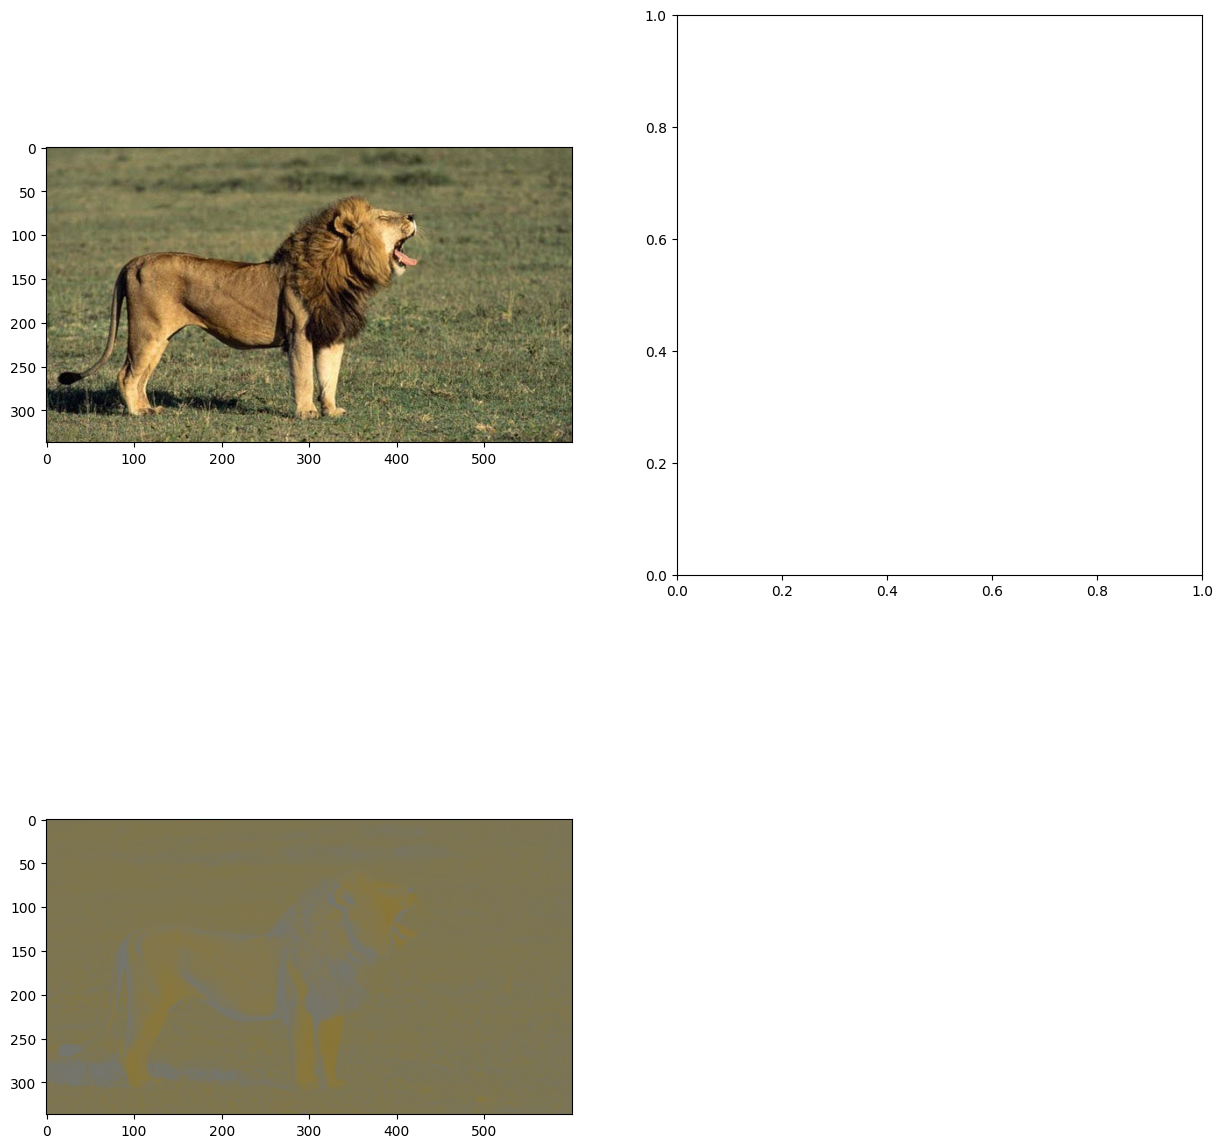

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from PIL import Image

# 讀取老虎圖片
lion = Image.open("/content/lion.jpg")

# 將圖片轉換為Numpy數組
train = np.array(lion)

# 將像素值標準化到[0, 1]之間
train = train.astype('float32') / 255.

# 定義Autoencoder模型
input_img = Input(shape=(train.shape[0], train.shape[1], train.shape[2]))
encoded = Dense(64, activation='relu')(input_img)
decoded = Dense(train.shape[2], activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# 定義Encoder模型
encoder = Model(input_img, encoded)

# 定義Decoder模型
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# 編譯Autoencoder模型
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 將訓練數據分為訓練集和驗證集
x_train = train.reshape(-1, train.shape[0], train.shape[1], train.shape[2])
x_val = x_train

# 訓練Autoencoder模型
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_val, x_val))

# 使用Encoder模型對圖片進行降維
encoded_imgs = encoder.predict(x_val)
# 使用Decoder模型將降維後的結果轉換為圖片
encoded_imgs = encoded_imgs.reshape(202200,64)
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs = decoded_imgs.reshape(-1, train.shape[0], train.shape[1], train.shape[2])

# 顯示原始圖片和重構圖片
n = 10  # 顯示前10張圖片
plt.figure(figsize=(20*4, 4*4))
for i in range(n):
    # 原始圖片
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i])
    plt.gray()
    # 降維後的結果
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from PIL import Image

# 讀取老虎圖片
lion = Image.open("/content/lion.jpg")

# 將圖片轉換為Numpy數組
train = np.array(lion)

# 將像素值標準化到[0, 1]之間
train = train.astype('float32') / 255.

# 定義Autoencoder模型
input_img = Input(shape=(train.shape[0], train.shape[1], train.shape[2]))
encoded = Dense(128, activation='relu')(input_img)  # 增加了神經元數量，更多的特徵提取
encoded = Dense(64, activation='relu')(encoded)  # 增加了一層神經網絡，更多的特徵提取
decoded = Dense(128, activation='relu')(encoded)  # 增加了一層神經網絡，更好的重構能力
decoded = Dense(train.shape[2], activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)

# 定義Encoder模型
encoder = Model(input_img, encoded)

# 定義Decoder模型
encoded_input = Input(shape=(64,))
decoder_layer1 = autoencoder.layers[-2]  # 從倒數第二層開始取
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer2(decoder_layer1(encoded_input)))

# 編譯Autoencoder模型
autoencoder.compile(optimizer='adam', loss='mse')  # 使用 MSE 作為損失函數

# 將訓練數據分為訓練集和驗證集
x_train = train.reshape(-1, train.shape[0], train.shape[1], train.shape[2])
x_val = x_train

# 訓練Autoencoder模型
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_val, x_val))

# 使用Encoder模型對圖片進行降維
encoded_imgs = encoder.predict(x_val)
# 使用Decoder模型將降維後的結果轉換為圖片
encoded_imgs = encoded_imgs.reshape(202200,64)
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs = decoded_imgs.reshape(-1, train.shape[0], train.shape[1], train.shape[2])

# 顯示原始圖片和重構圖片
n = 10  # 顯示前10張圖片
plt.figure(figsize=(20*4,4*4))
for i in range(n):
    # 原始圖片
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i])
    plt.gray()
    # 降維後的結果
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
plt.show()


Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.0318 - val_loss: 0.0301
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 0.0301 - val_loss: 0.0287
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 0.0287 - val_loss: 0.0273
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 0.0273 - val_loss: 0.0260
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 0.0260 - val_loss: 0.0247
Epoch 6/100
1/1 [==============================] - 4s 4s/step - loss: 0.0247 - val_loss: 0.0234
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.0234 - val_loss: 0.0222
Epoch 8/100
1/1 [==============================] - 3s 3s/step - loss: 0.0222 - val_loss: 0.0211
Epoch 9/100
1/1 [==============================] - 4s 4s/step - loss: 0.0211 - val_loss: 0.0202
Epoch 10/100
1/1 [==============================] - 4s 4s/step - loss: 0.0202 - val_loss: 0.0197
Epoch 11/100
1/1 [=====================

IndexError: ignored

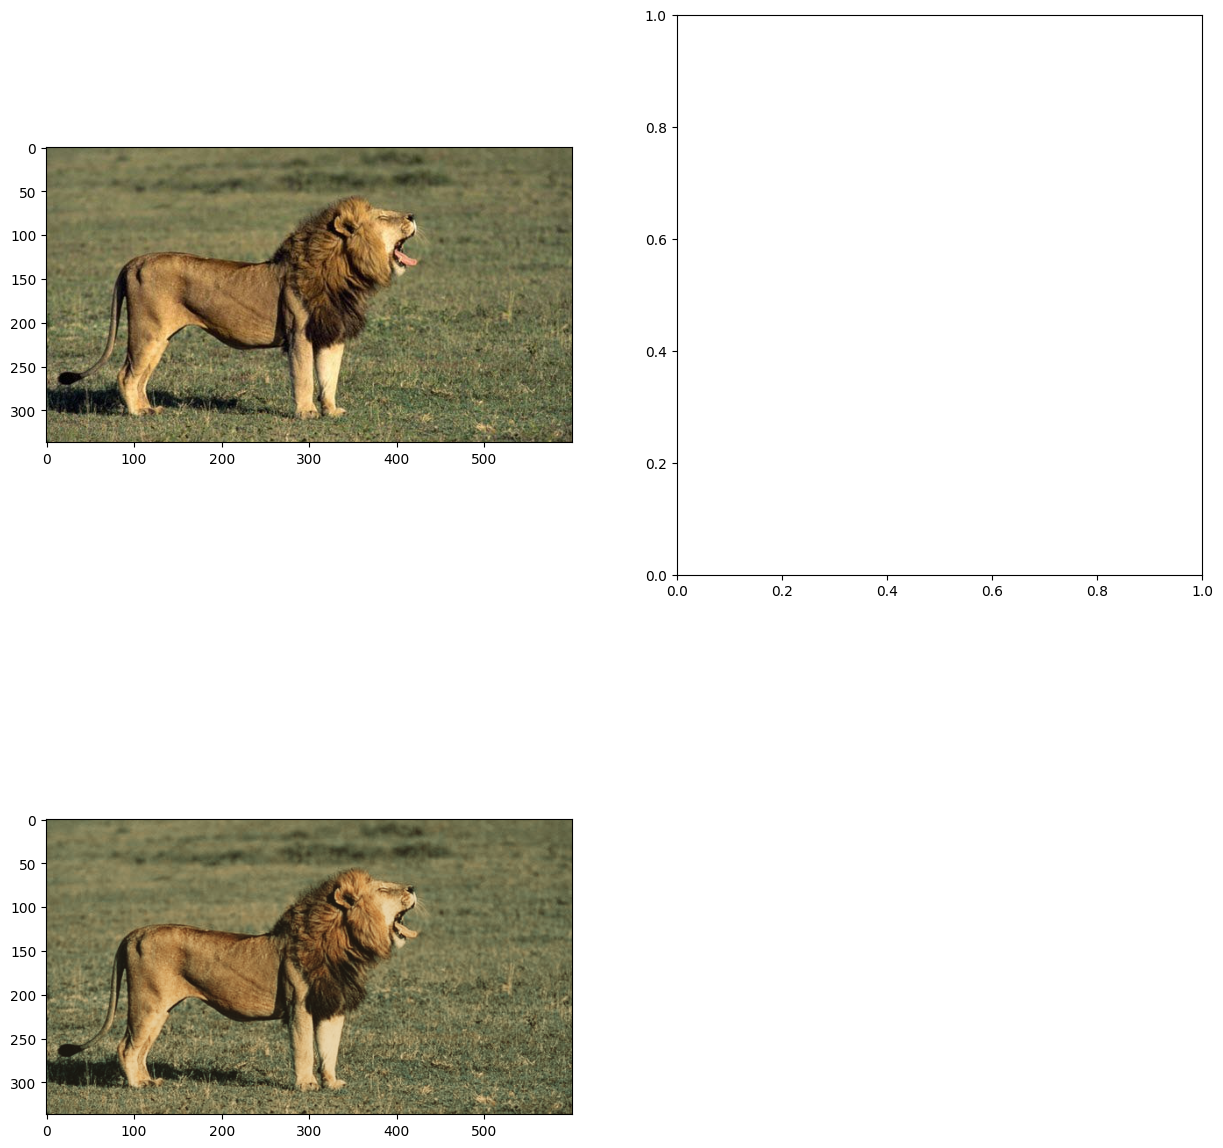

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from PIL import Image

# 讀取老虎圖片
lion = Image.open("/content/lion.jpg")

# 將圖片轉換為Numpy數組
train = np.array(lion)

# 將像素值標準化到[0, 1]之間
train = train.astype('float32') / 255.

# 定義Autoencoder模型
input_img = Input(shape=(train.shape[0], train.shape[1], train.shape[2]))
encoded = Dense(256, activation='relu')(input_img)  # 提高了神經元數量，更多的特徵提取
encoded = Dense(128, activation='relu')(encoded)  # 增加了一層神經網絡，更多的特徵提取
decoded = Dense(256, activation='relu')(encoded)  # 增加了一層神經網絡，更好的重構能力
decoded = Dense(train.shape[2], activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)

# 定義Encoder模型
encoder = Model(input_img, encoded)

# 定義Decoder模型
encoded_input = Input(shape=(128,))
decoder_layer1 = autoencoder.layers[-2]  # 從倒數第二層開始取
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer2(decoder_layer1(encoded_input)))

# 編譯Autoencoder模型
autoencoder.compile(optimizer='adam', loss='mse')  # 使用 MSE 作為損失函數

# 將訓練數據分為訓練集和驗證集
x_train = train.reshape(-1, train.shape[0], train.shape[1], train.shape[2])
x_val = x_train

# 訓練Autoencoder模型
autoencoder.fit(x_train, x_train,
                epochs=100,  # 提高epochs數量
                batch_size=128,
                shuffle=True,
                validation_data=(x_val, x_val))

# 使用Encoder模型對圖片進行降維
encoded_imgs = encoder.predict(x_val)
# 使用Decoder模型將降維後的結果轉換為圖片
encoded_imgs = encoded_imgs.reshape(202200, 128)
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs = decoded_imgs.reshape(-1, train.shape[0], train.shape[1], train.shape[2])

# 顯示原始圖片和重構圖片
n = 10  # 顯示前10張圖片
plt.figure(figsize=(20*4,4*4))
for i in range(n):
    # 原始圖片
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i])
    plt.gray()
    # 降維後的結果
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
plt.show()
